In [4]:
### SGD ###
import torch

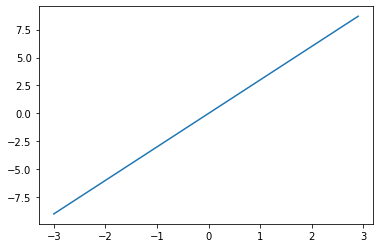

In [5]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

x = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 3 * x

import matplotlib.pyplot as plt
plt.plot(x.numpy(), f.numpy())
plt.show()